In [9]:
# Importando as bibliotecas para análise

import pandas as pd # usado para trabalhar com o dataFrame
import matplotlib.pyplot as plt # usado par a visualização dos dados
plt.style.use('seaborn') # está sendo configurado o estilo usado nas visualizações

In [10]:
# Criando o dataFrame

df = pd.read_excel('AdventureWorks.xlsx')

In [11]:
# Visualisando as primeiras linhas do dataFrame

df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [12]:
# verificando a quantidade de linha do dataFrame

df.shape

(904, 16)

In [13]:
# Verificando os tipos de dados contidos na dataFrame

df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [14]:
# Visualizando a receita total

df['Valor Venda'].sum()

5984606.1426

In [15]:
# Verificando o custo total de cada produto

df['Custo'] = df['Custo Unitário'].mul(df["Quantidade"]) # criando a coluna de custo

In [16]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [17]:
# verificando o custo total

round(df['Custo'].sum(), 2) # está sendo feito a soma total da coluna Custo, retornado até 2 casas decimais

2486783.05

In [18]:
# Verificando o lucro total
# Será criada uma coluna de Lucro que será Receita - Custo

df['Lucro'] = df['Valor Venda'] - df['Custo']

In [19]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [20]:
# Verificando o total de lucro

round(df['Lucro'].sum(), 2)

3497823.09

In [21]:
# Criando uma coluna com total de dias para enviar o produto

df['Tempo_envio'] = df['Data Envio'] - df['Data Venda']

In [22]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


verificando o tempo médio de envio par cada marca, e a coluna Tempo_envio será mudada para tipo numérica

In [23]:
# extraindo apenas os dias

df['Tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [34]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [25]:
# verificando o tipo de coluna Tempo_envio

df['Tempo_envio'].dtype

dtype('int64')

In [26]:
# Média do tempo de envio por marca

df.groupby('Marca')['Tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

# Missing Value(valores ausentes)

In [27]:
# verificando se tem valores ausentes no dataFrame

df.isnull().sum() # se caso hover valores faltantes, ele retornara o total

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

Extraindo o Lucro por ano e por Marca

In [35]:
# fazendo o agrupamento por ano e por marca

df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [30]:
pd.options.display.float_format = '{:20,.2f}'.format # usado par tirar a notação cientifica

In [37]:
# Resetando o index

lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [32]:
# total de produtos vendidos

df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

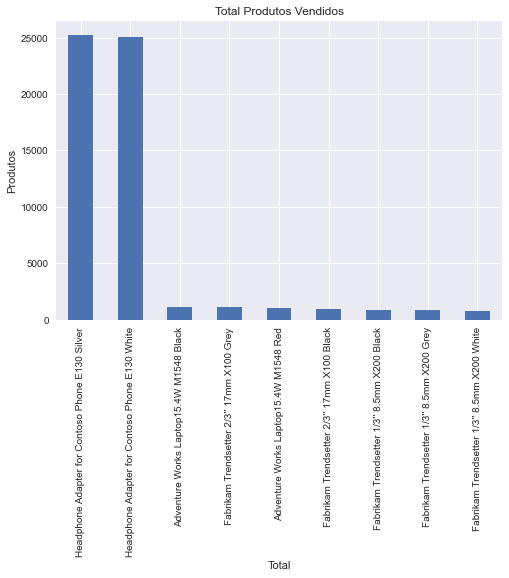

In [36]:
# Gráfico com total de produtos vendidos

df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).plot.bar(title='Total Produtos Vendidos')
plt.xlabel('Total')
plt.ylabel('Produtos');


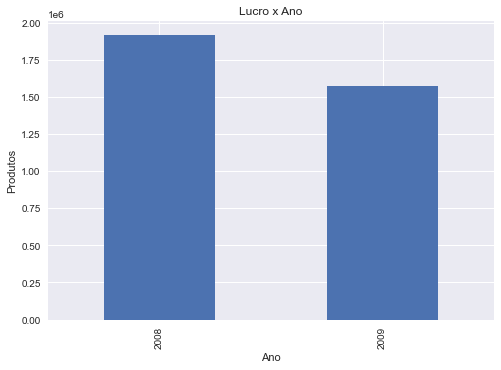

In [38]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Produtos');

In [39]:
# verificando o lucro total em cada ano

df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [42]:
# Selecionando apenas as vendas de 2009

df_2009 = df[df['Data Venda'].dt.year == 2009] # filtrando apenas por 2009

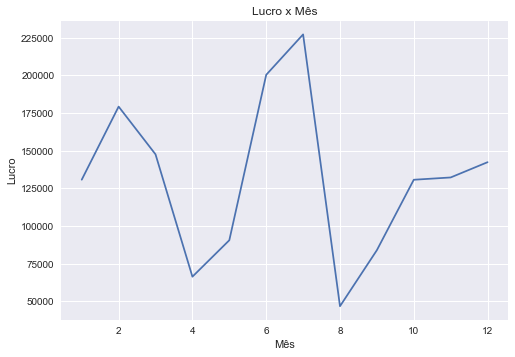

In [47]:
# plotando um gráfico de linha de lucro por mês

df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro x Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro');

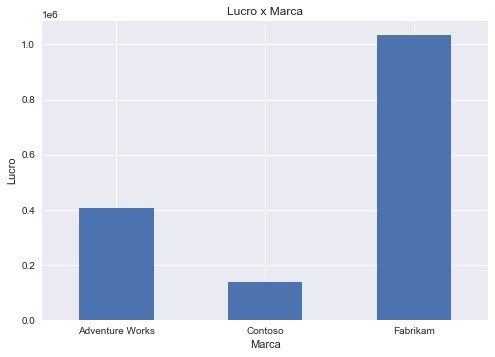

In [50]:
# plotando um gráfico de barra de lucro por mês

df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title='Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

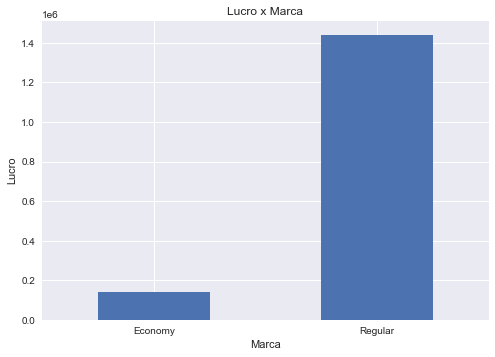

In [45]:
# plotando um gráfico de lucro por marca

df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title='Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [51]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

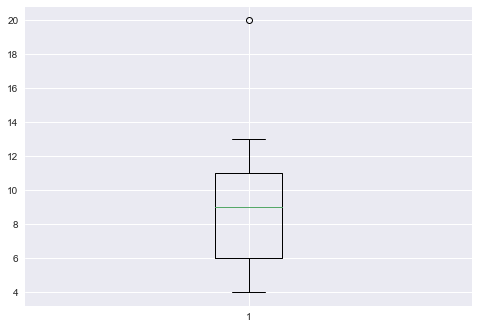

In [53]:
# Gerando gráfico de Bloxplot

plt.boxplot(df['Tempo_envio']);

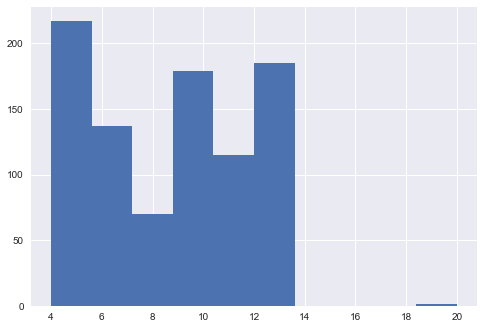

In [54]:
# Gerando um histograma

plt.hist(df['Tempo_envio']);

In [55]:
# Tempo mínimo de envio

df['Tempo_envio'].min()

4

In [56]:
# Tempo máximo de envio

df['Tempo_envio'].max()

20

In [57]:
# Identificando um outliet

df[df['Tempo_envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [58]:
# Salvando o arquivo de analise em formato '.csv'

df.to_csv('df_vendas_novo.csv', index=False)